In [113]:
import requests
import zipfile
import random
import numpy as np
import cv2
import os
import glob
import shutil
from imutils import paths
import imutils
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from keras.layers import Dropout
from keras.layers import MaxPool2D
from tensorflow.keras import backend as K

In [114]:
def download_dataset_zip(name_archive, url):
  f=open(rf'{name_archive}.zip',"wb")
  ufr = requests.get(url) #делаем запрос
  f.write(ufr.content) #записываем содержимое в файл; как видите - content запроса
  f.close()

In [115]:
def unpack(name_archive, path):
  fantasy_zip = zipfile.ZipFile(f'{name_archive}.zip')
  fantasy_zip.extractall(path)

In [116]:
def download_image(url_file,path, name_image):
  rows = open(url_file).read().strip().split("\n")
  item = 0
  for row in rows:
    try:
      file_image = open(f'{path}/{name_image}.{item}.jpg','wb')
      file_image.write(requests.get(row).content)
      file_image.close()
      item+=1
    except:
      print(f'Error {item}')


In [117]:
def del_non_img(path):
  for imagePath in paths.list_images(path):
	  delete = False
	  try:
		  image = cv2.imread(imagePath)
		  if image is None:
			  delete = True
	  except:
		  print("Except")
		  delete = True
	  if delete:
		  print("deleting {}".format(imagePath))
		  os.remove(imagePath)

In [118]:
name_archive = 'hijab'
url = "https://github.com/najcardboyz/naja-dataset/archive/master.zip"
path_unpack = '/content/'

In [119]:
download_dataset_zip(name_archive, url)

In [120]:
unpack(name_archive, path_unpack)

In [121]:
shutil.move("/content/naja-dataset-master/dataset-acak-5000", "/content/images")

'/content/images'

In [122]:
imageDataPath = sorted(list(paths.list_images('/content/naja-dataset-master/sisa/hijab')))

In [123]:
for img in imageDataPath:
  shutil.move(img, '/content/images/hijab')

In [124]:
imageDataPath = sorted(list(paths.list_images('/content/naja-dataset-master/sisa/nonhijab')))

In [125]:
for img in imageDataPath:
  shutil.move(img, '/content/images/nonhijab')

In [127]:
download_image('nonhibab.txt','/content/download', 'lol')

Error 74
Error 79
Error 115
Error 139
Error 330


In [128]:
del_non_img('/content/download')

deleting /content/download/lol.595.jpg
deleting /content/download/lol.203.jpg
deleting /content/download/lol.264.jpg
deleting /content/download/lol.396.jpg
deleting /content/download/lol.327.jpg
deleting /content/download/lol.282.jpg
deleting /content/download/lol.80.jpg
deleting /content/download/lol.299.jpg
deleting /content/download/lol.240.jpg
deleting /content/download/lol.238.jpg
deleting /content/download/lol.164.jpg
deleting /content/download/lol.321.jpg
deleting /content/download/lol.206.jpg
deleting /content/download/lol.202.jpg
deleting /content/download/lol.293.jpg
deleting /content/download/lol.247.jpg
deleting /content/download/lol.366.jpg
deleting /content/download/lol.315.jpg
deleting /content/download/lol.151.jpg
deleting /content/download/lol.183.jpg
deleting /content/download/lol.237.jpg
deleting /content/download/lol.73.jpg
deleting /content/download/lol.252.jpg
deleting /content/download/lol.249.jpg
deleting /content/download/lol.24.jpg
deleting /content/download/l

In [129]:
total=5723

In [130]:
searchedfile = sorted(list(paths.list_images(('/content/download/'))))

In [131]:
for filename in searchedfile:
    im = cv2.imread(filename)
    total+=1
    FaceFileName = "/content/images/nonhijab/nonhijab" + f"{total}.jpg"
    cv2.imwrite(FaceFileName, im)

In [132]:
del_non_img('/content/images/nonhijab')

In [173]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
data = []
labels = []
path_data = '/content/images'

In [174]:
imagePaths = sorted(list(paths.list_images(path_data)))
random.seed(42)
random.shuffle(imagePaths)

In [176]:
for imagePath in imagePaths:
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data.append(image)
	label = imagePath.split(os.path.sep)[-2]
	label = 1 if label == "hijab" else 0
	labels.append(label)

In [178]:
total=1
for i in labels:
  if i == 0:
    total+=1
print(total)

6566


In [179]:
class Net:
  @staticmethod
  def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    if K.image_data_format() == 'channels_first':
      inputShape = (depth, heigth, width)

    model.add(Conv2D(20, (5,5), padding='same', input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    #model.add(Conv2D(filters=32, kernel_size=(5,5),padding='same' , activation='relu', input_shape=inputShape))
    #model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    #model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(Dropout(rate=0.25))
    #model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    #model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    #model.add(MaxPool2D(pool_size=(2, 2)))
    #model.add(Dropout(rate=0.25))
    #model.add(Flatten())
    #model.add(Dense(256, activation='relu'))
    #model.add(Dropout(rate=0.5))
    #model.add(Dense(classes, activation='softmax'))
    return model

In [180]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [181]:
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [182]:
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

In [183]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

In [184]:
model = Net.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer='Adam',
	metrics=["accuracy"])

In [186]:
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)

Epoch 1/25
274/274 [==============================] - 16s 60ms/step - loss: 0.4744 - accuracy: 0.7815 - val_loss: 0.3777 - val_accuracy: 0.8376
Epoch 2/25
274/274 [==============================] - 16s 60ms/step - loss: 0.3898 - accuracy: 0.8299 - val_loss: 0.2670 - val_accuracy: 0.8892
Epoch 3/25
274/274 [==============================] - 16s 60ms/step - loss: 0.3622 - accuracy: 0.8459 - val_loss: 0.2520 - val_accuracy: 0.9029
Epoch 4/25
274/274 [==============================] - 16s 60ms/step - loss: 0.3252 - accuracy: 0.8609 - val_loss: 0.2381 - val_accuracy: 0.9145
Epoch 5/25
274/274 [==============================] - 16s 59ms/step - loss: 0.3132 - accuracy: 0.8677 - val_loss: 0.2175 - val_accuracy: 0.9152
Epoch 6/25
274/274 [==============================] - 16s 59ms/step - loss: 0.2933 - accuracy: 0.8758 - val_loss: 0.2346 - val_accuracy: 0.9036
Epoch 7/25
274/274 [==============================] - 16s 59ms/step - loss: 0.2612 - accuracy: 0.8888 - val_loss: 0.2006 - val_accuracy:

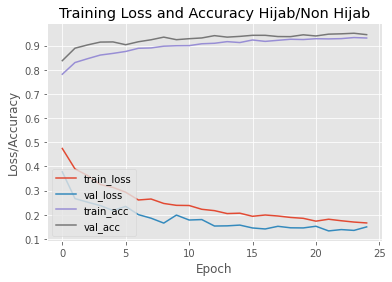

In [187]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy Hijab/Non Hijab")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [188]:
model.save("my_model28_6.h5")

In [222]:
model = load_model('my_model28_6.h5')

In [230]:
def predict(img,model):
  image = cv2.imread(img)
  orig = image.copy()
  image = cv2.resize(image, (28, 28))
  image = image.astype("float") / 255.0
  image = img_to_array(image)
  image = np.expand_dims(image, axis=0)
  (notHijab, hijab) = model.predict(image)[0]
  label = "Hijab" if hijab > notHijab else "Not Hijab"
  proba = hijab if hijab > notHijab else notHijab
  label = "{}: {:.2f}%".format(label, proba * 100)
  output = imutils.resize(orig, width=400)
  cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
	0.7, (0, 255, 0), 2)
  plt.imshow(output)
  plt.show()

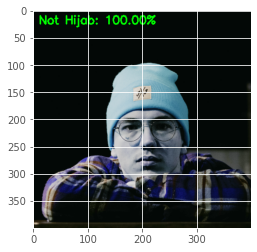

In [231]:
predict('img6.jpg', model)

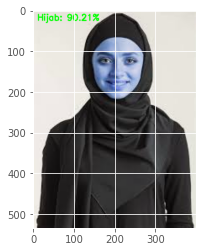

In [232]:
predict('img.jpg', model)

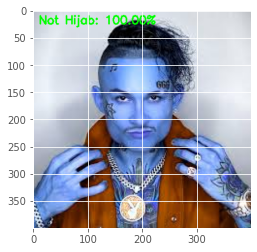

In [233]:
predict('img1.jpg', model)